# This file is made to consolidate csv data and also analyze the data

In [1]:
import re
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import math


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# f = open(".\data\Alexis_ordinal_im1_br_0.csv", "r")
# # print(f.read()) 

In [3]:
# name = f.

In [4]:
# l1, l2

In [5]:
# import re

In [6]:
'''
Input:
    fileName - A string in the form of "Name_ordinal_im2_br_0.csv"

Splits it into name, scale, image name, property, attempt no.
Returns: [name,scale,image name, property, attempt no.]
'''
def processName(fileName):
    splitFileName = re.split('_|\.',fileName)
    name, scale, imName, prop, attempt = splitFileName[:-1] #Prop is short for property like (br, con, sat)
    # print(name,scale,imName, prop, tr)
    attempt = int(attempt) #Parse from string to int
    return [name,scale,imName,prop,attempt]

'''
Input:
    file - A file to process the name from
Return [name,scale,image name, property, attempt no.]
'''
def processNameFromFile(file):
    fname = file.name.split("\\")[2]
    return processName(fname)

In [7]:
# print(processNameFromFile(f))

In [8]:
'''
This function is used in the createEntry function
Input:
    file - A single .csv data experiment file
Return:
    Chosen images in order of choice - should be sorted afterwards (image numbers)
'''
def processData(file):
    f = file.read()
    data = re.split('\n |\n\n' ,f)
    data = data[1:-1]
    res = []
#     print(processNameFromFile(file)) #For debugging
#     print(data)
    for entry in data:
        entr = entry.split(',')
#         print(entr)
        resp = int(entr[0])
        chosenImage = int(entr[resp+1]) #Select the image number and add to res[]
#         print(chosenImage,type(chosenImage))
        res.append(chosenImage)
    return res

'''
Simply sorts the given list and also returns it for convenience
'''
def sortData(choices):
    choices.sort()
    return choices

In [9]:
# f = open(".\data\Alexis_ordinal_im1_br_0.csv", "r")
# a = processData(f)
# sortData(a)

In [10]:
# mypath = ".\data"
# onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
# onlyfiles

In [11]:
def listFiles():
    mypath = ".\data"
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    return onlyfiles

In [12]:
# onlyfiles = listFiles()
# #onlyfiles

In [13]:
def createEntry(fname):
    #Create and process data
    nameData = processName(fname)
    name,scale,imName,prop,attempt = nameData #For simplicity
    path = ".\\data\\" + fname
    f = open(path,'r') #open the file
#     d = sortData(processData(f)) #Make data
    d = processData(f)
    
    #Create the entry
    entry = []
    entry.append(name) #First part of entry is the subject name
    entry.append(imName) #2nd part = image name
    entry.append(prop) #3rd part = property
    entry.append(attempt) #4th part = attempt no.
    entry.append(d) #5th part of entry is the data list
    return entry

def consolidate(fileNameList):
    res = [createEntry(fname) for fname in fileNameList]
    return res

In [14]:
# createEntry("Alexis_ordinal_im1_br_0.csv")

In [15]:
# # consolidateFor('br','im2')
# consolidate(onlyfiles)

In [16]:
# #Not needed anymore
# def consolidateAll():
#     imNames = ['im1','im2','im3','im4','im5','im6']
#     props = ['br','con','sat']
#     res = []
#     for p in props:
#         for n in imNames:
#             res+=consolidateFor(p,n)
#     return res

In [17]:
'''
Retrieves the entries that match the parameters
'''
def get(data, sName = '', imName='', prop='',attempt=''):
    #For safety
    if (data==None or data==[]):
        print("You didn't specify data or your data is empty.")
        return None
    if (sName=='' and imName=='' and prop=='' and attempt==''):
        print("Please specify at least one parameter.")
        return None
    
    #Actual function
    res = data
    if (sName!=''):
        res = [entry for entry in res if entry[0]==sName]
    if (imName!=''):
        res = [entry for entry in res if entry[1]==imName]
    if (prop!=''):
        res = [entry for entry in res if entry[2]==prop]
    if (attempt!=''):
        res = [entry for entry in res if entry[3]==attempt]
    return res
    

In [18]:
# allData = consolidate(onlyfiles)
# alexisdata = get(allData,'Alexis')
# chrisdata = get(allData,'Chris')
# # alexisdata, chrisdata
# # chrisdata

In [19]:
# test = get(allData, sName='Chris',prop='con')
# test

In [20]:
def writeAllData(d):
    f = open("alldata.csv",'w')
    line1 = "SubjectName,ImageName,Property,Attempt,Data\n"
    f.write(line1)
    for entry in d:
        line = ''
        for e in entry:
            s = str(e)+','
            line+=s
        line=line[:-1] #Remove the last ','
        line+="\n"#Add newline
#         print(str(line))
        f.write(line)
    f.close()

In [21]:
#writeAllData(allData)

In [22]:
# x = get(allData,imName='im2')
# print((0 or 'im1') in x[2])
# # x[:]
# # n = np.array(x)
# # sl = n[:][3]
# # # np.where(n=='int' and n>0)
# # ind = np.where(sl==max(sl))
# # ind
# # n[ind]
# # n.tolist()
# # np.where(t>1)
# # n
# # type(n[0,3])
# t = np.array([x[0]])
# np.append(t,[x[1]],axis=0)
# x

In [23]:
def mergeTries(data):
    d = list(data) #To not change the original data
    nd = np.array(d) #To work with np
    merged = []
    skiplist = [] #To not iterate over the same items, list of indexes
    for i in range(0,len(d)): #First iteration
        if i in skiplist:
            continue
        entry = d[i]
        toMerge = np.array([entry]) #ToMerge list only consists of current entry
        for j in range(0,len(d)): #Iterate again over list
            e = d[j] #2nd level entry
            if (e[0]==entry[0] and e[1] == entry[1] and e[2] == entry[2] and e[3] != entry[3]): #If entry is found again with different amount of tries:
                toMerge = np.append(toMerge, [e], axis=0) #Put that entry into toMerge list
                skiplist.append(j)
            l = len(toMerge)
        if (l>=1):
            values = np.array(toMerge[:,-1]) #Get the list of values
            vals = []
            for li in values:
                vals+=li
#             vals.sort() #Activate only if you want to sort data
            newEntry = entry[0:-2]
            newEntry.append(-l) #-l means that that amount of tries are finalized and merged
            newEntry.append(vals)
#             print(newEntry)
            merged.append(newEntry)
#             print(merged)
    return merged
        
        
#         if (len(duplicates)==0):
#             duplicates.append(entry)
#         else:
#             if (entry[0] and entry[1] and entry[2] in entries):
                

    
def averageTries(data):
    None

In [24]:
# m = mergeTries(x)
# print(m)

In [25]:
def convertEntry(entry):
    d = entry[4]
    counts = []
    r = [1,2,3,4,5,6]
    for i in r:
        counts.append(d.count(i))
    return counts

def convertEntries(entries):
    res = []
    for e in entries:
        res+=[convertEntry(e)]
    return res

def npConvertEntry(entry):
    return  np.array(convertEntry(entry))

def npConvertEntries(entries):
    return np.array(convertEntries(entries))

def convertAndAverageEntry(entry):
    d = entry[4]
    n = entry[3]*(-1) #That way we can e.g. divide by 2 if attempts is -2
    averagedCounts = []
    r = [1,2,3,4,5,6]
    for i in r:
        averagedCounts.append(d.count(i)/n)
    return averagedCounts

def convertAndAverageEntries(entries):
    res = []
    for e in entries:
        res+=[convertAndAverageEntry(e)]
    return res

def extractNames(entries):
    res = []
    for e in entries:
        name = e[0]
        if (not(name in res)):
            res.append(name)
    return res


In [26]:
# #npConvertEntries(m)
# mergedData = mergeTries(allData)
# normalizedData = convertAndAverageEntries(mergedData)
# # print(mergedData)
# s1 = get(mergedData,imName="im1",prop="sat")
# ns1 = convertAndAverageEntries(s1)
# print(ns1, extractNames(s1))

In [27]:
# # c1 = convertEntry(x[0])
# # print(c1)
# c = npConvertEntries(x)
# a = [1,2,3,4,5,6]
# br = ['0.7','0.85','1','1.15','1.3', '1.45']
# # plt.plot([1,2,3,4,5,6],[0,2,4,5,2,2])
# plt.bar(br,np.sum(c,0),color='blue',alpha=0.5)
# plt.xlabel("Brightness value")
# plt.ylabel("Amounts chosen")
# # plt.bar(a,c[1])

In [28]:
# # c1 = convertEntry(x[0])
# # print(c1)
# s1 = get(mergedData,imName="im1",prop="sat")
# ns1 = convertAndAverageEntries(s1)
# names = extractNames(s1)
# a = [1,2,3,4,5,6]
# br = ['0.7','0.85','1','1.15','1.3', '1.45']
# # plt.plot([1,2,3,4,5,6],[0,2,4,5,2,2])
# b1 = plt.bar(br,ns1[0],color='blue',alpha=0.5)
# b2 = plt.bar(br,ns1[1],color='red',alpha=0.5)
# plt.xlabel("Brightness value")
# plt.ylabel("Amounts chosen")
# plt.legend((b1,b2),(names[0],names[1]))
# # plt.bar(a,c[1])

In [29]:
#These are single plot functions
yticks = np.arange(0.0,5.5,0.5)
xticks = np.arange(1,7,1)
br = [0.7,0.85,1,1.15,1.3, 1.45]
con = [0.7,0.85,1,1.15,1.3, 1.45]
sat = [0.75,0.9,1,1.2,1.4,1.6]
propertyValues = {
    'br': br,
    'con': con,
    'sat': sat
}
propertyLabels = {
    'br':"Brightness value",
    'con':"Contrast value",
    'sat':"Saturation value"
}

propertyNames = {
    'br':"brightness",
    'con':"contrast",
    'sat':"saturation"
}

# colors = ['orange','blue','green','red','yellow','purple','cyan']
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
#MSE functions
def mse(entries):
    data = np.array(convertAndAverageEntries(entries))
    avg = np.average(data,axis=0)
    sqDiff = np.power(avg-data,2)
    mse = np.sum(sqDiff)
    return mse

def listAllMse(entries):
    res = []
    maximumMseAndImage = [0.0,'']
    for imName in imgNames:
        imMse = 0.0
        for p in props:
            data = get(entries,imName=imName,prop=p)
            MSE = mse(data)
            imMse+=MSE
            s = f'Image name: {imName}, Property: {propertyNames[p]}, MSE: {"%.3f" % MSE}'
            res.append(s)
        if(maximumMseAndImage[0]<=imMse):
            maximumMseAndImage = [imMse,imName]
        res.append(f'Summed MSE for {imName}: {"%.3f" % imMse}')
    res.append(f'Max MSE: {"%.3f" % maximumMseAndImage[0]} achieved for {maximumMseAndImage[1]}')
    return res
#To create a plot title
def makeTitle(n,stack,average, imname, propname):
    s = ""
    if(stack==True):
        s+= "Stacked bar "
    else:
        s+= "Grouped bar "
    s+= f"plot for n={n} subjects with "
    if (average==True):
        s+= "averaged "
    else:
        s+= "summed "
    s+= f"values\nfor image {imname[2:]} and variated {propertyNames[propname]}"
    return s

'''
Input: 
    entries - Sliced raw data of entries (usually coming from the either the "get" ort he "convertAndAverageEntries" function)
    stack (optional) - Give False if this plot should be merged instead of stacked
Gets raw data and sums up the times each variation was chosen and plots them in stacked bar diagram (for 1 propert and 1 specific image)
'''
def makePlotForSlice(entries, stack=True,average=True):
    if (average == True):
        c = convertAndAverageEntries(entries)
    else:
        c = npConvertEntries(entries)
    
    #Get the names to create a proper stacked bar diagram
    names = extractNames(entries)
    n = len(names) #n = number of subjects
    
    #Get image name
    imname = entries[0][1]
    
    #Get property name
    prop = entries[0][2]
    
    #Assign correct values for x(ticks)
    xNames = propertyValues[prop]
    x = np.array([1,2,3,4,5,6])
#     plt.bar(br,np.sum(c,0),color='blue',alpha=0.5) #Sum up all values across axis-0
    
    #Aesthetic parameters
    width = 0.55
    if (stack==True):
        a = 1.0
        w=0
    else:
        a = 1.0
        w = width/n #To put bars next to each other
    
    bars = []
    for i in range(0,len(c)): #For each entry in c
        if(stack==True):
            if (i==0):
                bar = plt.bar(x,c[i], width,alpha=a)
            else:
                bar = plt.bar(x,c[i], width, bottom=c[i-1],alpha=a)
        elif(stack==False):
            bar = plt.bar(x+(i*w),c[i],width=w,alpha=a)
        bars.append(bar)

    #Set labels
    plt.xticks(x-w/2+width/2,xNames)
    plt.yticks(yticks)
    plt.xlabel(propertyLabels[prop])
    plt.ylabel("Times chosen")
    plt.legend(bars,names)
    title = makeTitle(n,stack, average, imname, prop)
    plt.title(title)
    plt.show()
    
def plotOverallAverageForProperty(entries, p):
    #Process data
    e = get(entries, prop=p)
    c = convertAndAverageEntries(e)
    c = np.array(c)
    c = np.average(c, axis=0)
    names = extractNames(entries)
    n=len(names)
    x = xticks
    xLabels = propertyValues[p]
    
    #Aesthetic parameters
    width = 0.55
    a = 1.0 #alpha
    
    #Plot
#     hlines = plt.hlines(yticks,linestyles='dashed',color='grey',lw=0.5)
    b = plt.bar(x, c, width,alpha=a)
    plt.xticks(x,xLabels)
    plt.yticks(yticks)
    plt.xlabel(propertyLabels[p])
    plt.ylabel("Times chosen")
    plt.title(f"Bar plot for n={n} subjects, for all images\nand variated {propertyNames[p]}")
    plt.show()
    return b

#These are subplotting functions

def plotOverallAverageForPropertyForAxe(entries, p, ax, col='C0'):
    #Process data
    e = get(entries, prop=p)
    c = convertAndAverageEntries(e)
    c = np.array(c)
    c = np.average(c, axis=0)
    names = extractNames(entries)
    n=len(names)
    x = xticks
    xLabels = propertyValues[p]
    
    #Aesthetic parameters
    width = 0.55
    a = 1.0 #alpha
    
    #Plot
    b = ax.bar(x, c, width,alpha=a, color=col)
#     hlines = ax.hlines(yticks,0,1,transform=ax.get_yaxis_transform(),linestyles='dashed',color='grey',lw=0.5,zorder=0)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xticklabels(xLabels)
    ax.set_xlabel(propertyLabels[p])
    ax.set_ylabel("Times chosen")
    ax.set_title(f"Bar plot for n={n} subjects, for all images\nand variated {propertyNames[p]}")
    return b

def plotForImage(entries, imageName, ax, p,col='c0',averageBetweenUsers=False):
    #Process data
    entr = get(entries,imName=imageName) #filter data according to image name
    e = get(entr,prop=p) #e is the filtered data according to property
    c = np.array(convertAndAverageEntries(e)) #c stands for converted entries
    #If users should be consolidated, averafe the converted entries
    if (averageBetweenUsers==True):
        c = np.average(c, axis=0)
    names = extractNames(e)
    n=len(names)
    x=xticks
    xLabels=propertyValues[p]
    MSE = "%.2f" % mse(e)
    
    #Aesthetic parameters
    width=0.55
    w=width
    a = 1.0 #alpha
    
#     print(c)
    #Plot
#     hlines = ax.hlines(yticks,0,1,transform=ax.get_yaxis_transform(),linestyles='dashed',color='grey',lw=0.5,zorder=0)
    if(averageBetweenUsers==True):
        b = ax.bar(x, c, width, alpha=a, color=col)
        ax.set_xticks(x)
        ax.set_xticklabels(xLabels)
    else:
        bs=[]
        w=width/n
#         wHelp = 
        for i in range(0,len(names)):
            name = names[i]
            b = ax.bar(x+(i*w), c[i], w, alpha=a, color=colors[i])
            bs.append(b)
#         ax.set_xticks(x+(w/2)) #Works for n=2
        ax.set_xticks(x-w/2+width/2)
        ax.set_xticklabels(xLabels)
        ax.legend(bs,names)
        
    ax.set_xlabel(f"{propertyLabels[p]}, MSE = {MSE}")
    ax.set_yticks(yticks)
    ax.set_ylabel("Times chosen")
#     ax.set_title(f"Bar plot for n={n} subjects, for all image {imageName[2:]}\nand variated {propertyNames[p]}")
    ax.set_title(f"n={n}, {imageName}, {propertyNames[p]}, avg: {averageBetweenUsers}")
    return b
        
        
        
        

In [30]:
#These are subplotting functions

In [31]:
props = ['br','con','sat']
imgNames = ["im1","im2","im3","im4","im5","im6"]
colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']

#Takes multiple arguments and converts them to a list
def showAverage(d):
    columns = len(props)
    rows=1
    #Create figure
    fig, axs = plt.subplots(rows,columns,figsize=(columns*5.5,rows*3.5))
    
    for i in range(0,len(axs)):
        ax = axs[i]
        prop = props[i]
        plotOverallAverageForPropertyForAxe(d,prop,ax,colors[i])

def showForImage(d, imName, avg=False):
    columns = len(props)
    rows=1
    #Create figure
    fig, axs = plt.subplots(rows,columns,figsize=(columns*5.5,rows*3.5))
    
    for i in range(0,len(axs)):
        ax = axs[i]
        prop = props[i]
        plotForImage(d, imName, ax, prop, col=colors[i],averageBetweenUsers=avg)
        
def showAll(d, avg=False):
    columns = len(props) #We are going to make a subplot of subplots
    rows = len(imgNames)
    #Create figure
    fig, axs = plt.subplots(rows,columns,figsize=(columns*5.5,rows*4))
#     print(axs)
    fig.tight_layout(pad=5.0)
    for r in range(0,rows):
        imName = imgNames[r] #Row 0 = 1st image
        for c in range(0,columns):
            ax = axs[r,c] #For example: ax = axs[4] for the 2nd row, 2nd column
            prop = props[c] #Iterate properties --> columns
            plotForImage(d, imName, ax, prop, col=colors[c],averageBetweenUsers=avg)


'''
This function makes plots, both average and not, for every image, for every property, based on MERGED DATA
'''
def do(d):
    for im in imgNames:
        showForImage(mergedData,im, avg=True)
        showForImage(mergedData,im, avg=False)

# Frage: Sollen wir den Average oder die Summe der Beobachtungen nehmen, wenn wir die Tries konsolidieren? Und wieso?

## More todos:
### <font color='green'>-Create function that takes average or calculates sum, to be used with the plots: DONE</font>
### -Create function that takes the plot, the chosen favorite image, and the original image
### -Create function that shows the plot & images, but for all properties of an image
### -Create function that shows the plot & images for each variation for each image
### -Create funciton that takes average of all images for one property

In [32]:
#The whole process

#Create a list of the .csv file names in <data> folder
fileNames = listFiles()

#Fetch and consolidate all data into one big list of entries
allData = consolidate(fileNames)

#Merge multiple tries into one, by concatenating the lists of values
mergedData = mergeTries(allData)

#Get a specific slice of data
slice1 = get(mergedData, imName='im6',prop='con') #Fetches data for im1 with variated saturation


#To show only a single plot:
# print(slice1)
# makePlotForSlice(slice1, stack=False, average=False)
# makePlotForSlice(slice1, stack=True, average=False)
# makePlotForSlice(slice1, stack=False, average=True)
# makePlotForSlice(slice1, stack=True, average=True)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # Remove the CWD from sys.path while we load stuff.
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If 

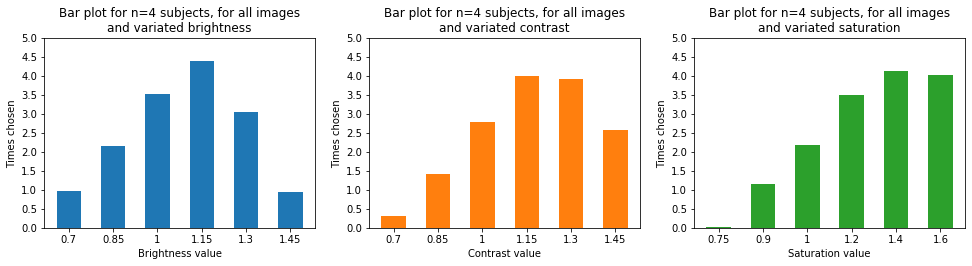

In [33]:
#To show 3 plots for all properties:


showAverage(mergedData)

In [34]:
#To show plots for one image only:


# showForImage(mergedData,'im2', avg=True) #Avg user ratings
# showForImage(mergedData,'im2', avg=False) #Make grouped bar plot instead

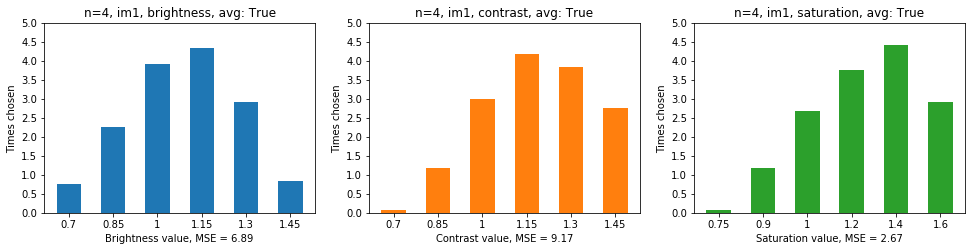

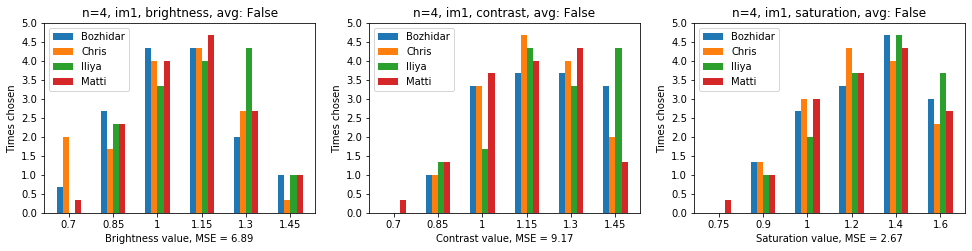

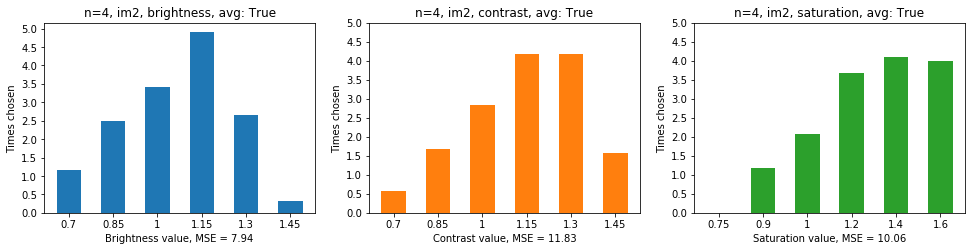

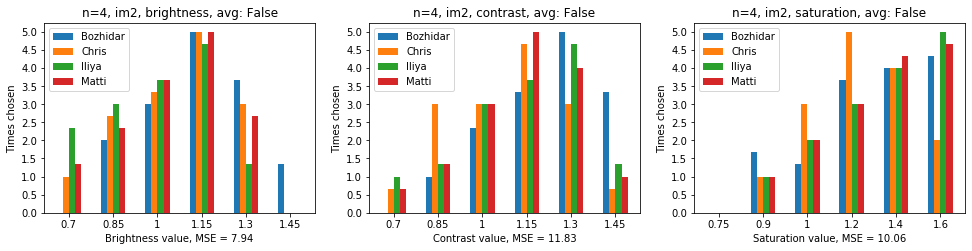

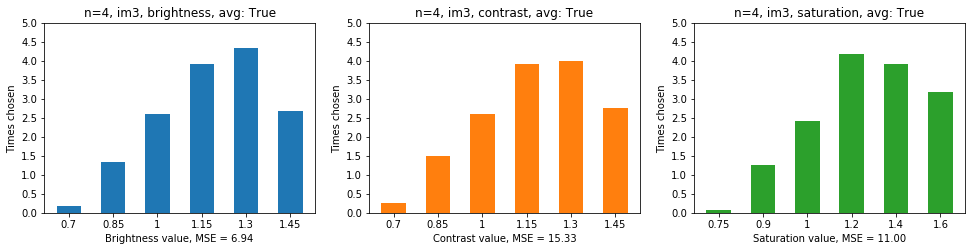

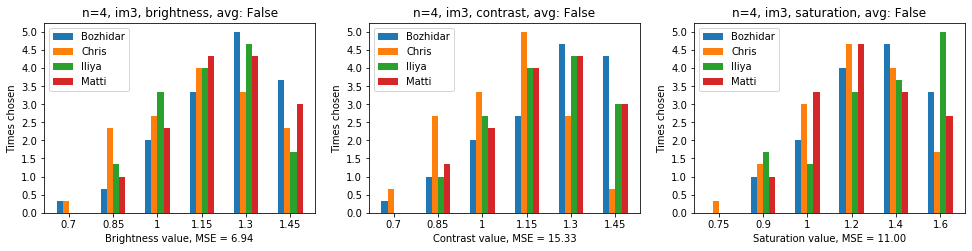

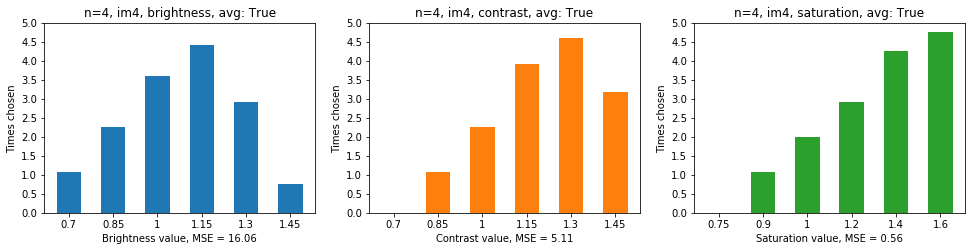

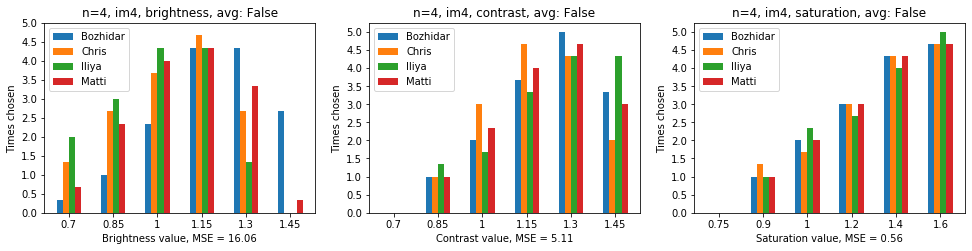

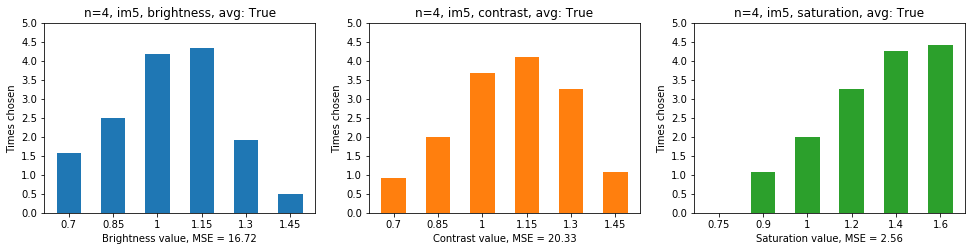

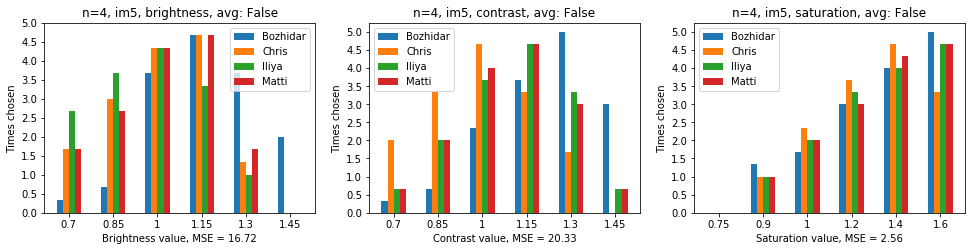

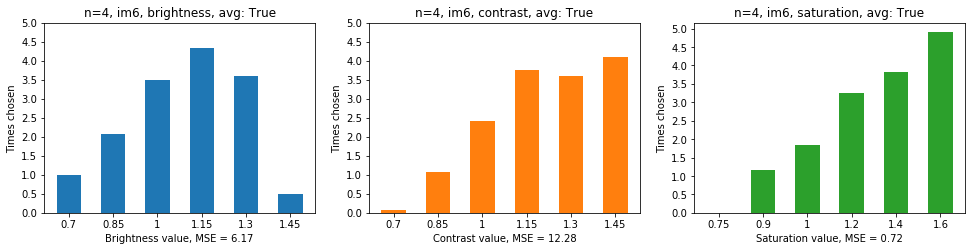

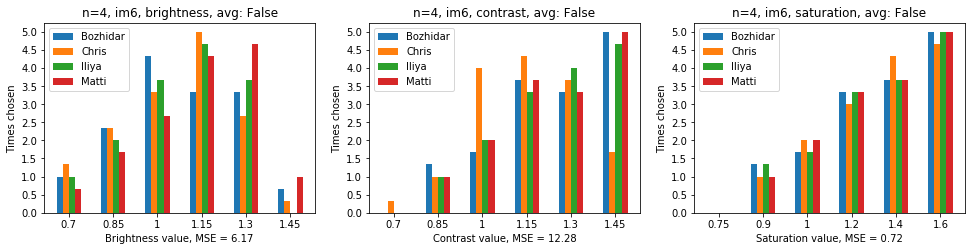

In [35]:
#To show everything for every image:


# showForAll(mergedData,avg=True)
# showForAll(mergedData,avg=False)

#Wrapper to simplify everything:
do(mergedData)

In [36]:
# get(allData,sName='Bozhidar')
# c = createEntry("Bozhidar_ordinal_im1_br_2.csv")
# o = open(".\data\Bozhidar_ordinal_im1_br_2.csv",'r')

# o2 = open(".\data\Chris_ordinal_im1_br_0.csv",'r')
# s=o.read()
# print(o2.read())
# createEntry("Chris_ordinal_im1_br_0.csv")
# c
# o.close()
# s

In [37]:
# np.arange(0,5,1)

In [38]:
# var1 = get(mergedData,imName='im2',prop='con')
# mse(var1)
lm = listAllMse(mergedData)
for s in lm:
    print(s)
# mse(var1)

Image name: im1, Property: brightness, MSE: 6.889
Image name: im1, Property: contrast, MSE: 9.167
Image name: im1, Property: saturation, MSE: 2.667
Summed MSE for im1: 18.722
Image name: im2, Property: brightness, MSE: 7.944
Image name: im2, Property: contrast, MSE: 11.833
Image name: im2, Property: saturation, MSE: 10.056
Summed MSE for im2: 29.833
Image name: im3, Property: brightness, MSE: 6.944
Image name: im3, Property: contrast, MSE: 15.333
Image name: im3, Property: saturation, MSE: 11.000
Summed MSE for im3: 33.278
Image name: im4, Property: brightness, MSE: 16.056
Image name: im4, Property: contrast, MSE: 5.111
Image name: im4, Property: saturation, MSE: 0.556
Summed MSE for im4: 21.722
Image name: im5, Property: brightness, MSE: 16.722
Image name: im5, Property: contrast, MSE: 20.333
Image name: im5, Property: saturation, MSE: 2.556
Summed MSE for im5: 39.611
Image name: im6, Property: brightness, MSE: 6.167
Image name: im6, Property: contrast, MSE: 12.278
Image name: im6, Pr

In [39]:
# import subprocess

In [40]:
# subprocess.call(['python', 'testing_scales.py',"Chris"])

In [41]:
# %run testing_scales.py

In [42]:
print(mergedData[0:2])
# createEntry("Bozhidar_ordinal_im1_br_2.csv")

[['Bozhidar', 'im1', 'br', -3, [2, 3, 4, 1, 1, 3, 4, 2, 2, 3, 3, 3, 4, 4, 5, 2, 3, 4, 5, 6, 3, 4, 2, 6, 3, 3, 3, 4, 4, 5, 2, 3, 4, 5, 6, 2, 4, 5, 2, 4, 3, 3, 4, 4, 5]], ['Bozhidar', 'im1', 'con', -3, [2, 3, 4, 5, 6, 3, 4, 5, 6, 3, 5, 6, 4, 6, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 3, 3, 3, 4, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 4, 5, 6, 4, 6, 5]]]


In [66]:
def convertEntryForHeatmap(entry):
    #Number of attempts
    N = abs(entry[3])
    data = entry[-1]
    l = int(len(data)/N) #Amount of individual comparisons in one attempt (=15)
    x = [1,2,3,4,5,6]
#     matrix = np.zeros((len(x),len(x)))
    nan = np.nan
    matrix = np.array([[nan, 0, 0, 0, 0, 0],
                       [3, nan, 0, 0, 0, 0],
                       [3, 3, nan, 0, 0, 0],
                       [3, 3, 3, nan, 0, 0],
                       [3, 3, 3, 3, nan, 0],
                       [3, 3, 3, 3, 3, nan]])
    matrix = np.where(matrix==3,matrix*(-1),matrix)
#     temp = data[0:l].copy()
#     print("first data: ")
#     print(temp)
#     print("N: ", N)
    for c in range(0,N):
        currData = data[c*l:l*(c+1)].copy()
#         print("currdata: ")
#         print(currData)
        for i in range(0,len(x)):
            for j in range(0,len(x)):
                #S1 is on x axis,
                #S2 is on y axis
                #S1 is more beautiful than S2:
                if (i==j):
                    matrix[i,j]=np.nan
                elif(i<j):
                    item = currData.pop(0)
                    if (item==i+1):
                        matrix[i,j]+=1
                        #Only use for complementary side of matrix
                        matrix[j,i]+=1
                    else:
                        continue
#                 elif(i>j):
#                     matrix[i,j]=-1
#     #Use to write complementary side of matrix
#     for i in range(0,len(x)):
#         for j in range(0,len(x)):
#             if (i>j):
#                 matrix[i,j] = matrix[i,j] + 3
#                 matrix[i,j] = matrix[i,j]*(-1)
#     matrix = np.where(matrix==(-0.0),0.0,matrix)
#         matrix = np.where(matrix<0,(matrix+3)*(-1),matrix)
    return matrix

In [130]:
matr = convertEntryForHeatmap(get(mergedData,sName='Chris', imName='im1',prop='br')[0])
# print(matr)
# arg = np.argwhere(np.isnan(matr))
# # matr[0,0]
# print(arg.shape)
# for i in range(0,arg.shape[0]):
#     index = tuple(arg[i])
#     matr[index] = 0
#     toSum = matr[i,:]+matr[:,i]
# #         toSum = np.where(np.isnan(matr2), 0, matr2)
#     matr[index] = np.sum(toSum)
    
def sumDiagonals(matrix):
    matr = np.array(matrix)
    arg = np.argwhere(np.isnan(matr)) #Array of diagonal indices
    for i in range(0, arg.shape[0]):
        index = tuple(arg[i])
        matr[index] = 0
        toSum = matr[i,:]+matr[:,i]
        matr[index] = np.sum(toSum)
    return matr

print(matr)
print(sumDiagonals(matr))

[[nan  0.  0.  1.  2.  3.]
 [-3. nan  0.  0.  0.  2.]
 [-3. -3. nan  1.  2.  3.]
 [-2. -3. -2. nan  3.  3.]
 [-1. -3. -1.  0. nan  3.]
 [ 0. -1.  0.  0.  0. nan]]
[[ -3.   0.   0.   1.   2.   3.]
 [ -3. -11.   0.   0.   0.   2.]
 [ -3.  -3.  -3.   1.   2.   3.]
 [ -2.  -3.  -2.   1.   3.   3.]
 [ -1.  -3.  -1.   0.   5.   3.]
 [  0.  -1.   0.   0.   0.  13.]]


In [123]:
sns.set_style('whitegrid')
sns.set_context('talk')
def heatMapForAxe(matrix,ax,prop,imName,sName):
    ax = sns.heatmap(matrix, square=True, 
                 cmap="flare", # can be changed to another sequential colormap
                 annot=True) # optional with numbers annotated
    ax.set_xticklabels(propertyValues[prop])
    ax.set_yticklabels(propertyValues[prop])
    ax.set_xlabel('Stimulus 1 (S1)')
    ax.set_ylabel('Stimulus 2 (S2)')
    ax.set_title(f'Abs. frequ."S1 more beautiful than S2"\n{sName},{propertyNames[prop]}, {imName}',pad=25)
#     ax.set_title(f'Abs. frequ."S1 more beautiful than S2"',pad=)
    return ax

f = plt.figure(figsize=(7, 5))
sns.set_style('whitegrid')
sns.set_context('talk')
ax = sns.heatmap(matr, square=True, 
                 cmap="flare", # can be changed to another sequential colormap
                 annot=True) # optional with numbers annotated
ax.set_xticklabels(propertyValues['br'])
ax.set_yticklabels(propertyValues['br'])
ax.set_xlabel('Stimulus 1 (S1)')
ax.set_ylabel('Stimulus 2 (S2)')


ax.set_title('Absolute frequencies "S1 more beautiful than S2"',pad=10)
plt.show()

In [124]:
# names = ["Bozhidar","Chris","Iliya","Matti"]
def heatMapForImageAndProperty(entries,imName,prop):
    data = get(entries,imName=imName,prop=prop)
    mn = []
    fig, axs = plt.subplots(1,len(data),figsize=(22,6))
    fig.tight_layout(pad=2.0)
    for i in range(0,len(data)):
        entry = data[i]
        name = entry[0]
#         print(entry)
#         print(len(entry[-1]))
#         entry = get(data,prop=prop,imName=imName,sName=names)
#         print(len(entry))
#         entry = entry[0]
        matr = convertEntryForHeatmap(entry)
        matr = sumDiagonals(matr)
        ax = axs[i]
        plt.sca(ax) #Select current ax
        hax = heatMapForAxe(matr, '', prop, imName, name)
#         print(hax)
    plt.show()
        

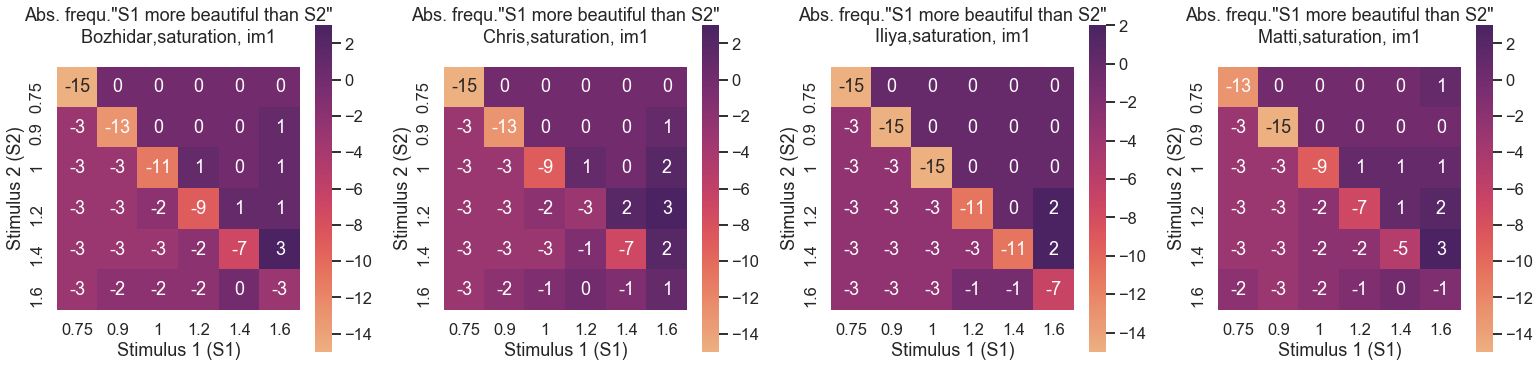

[['Bozhidar', 'im1', 'br', -3, [2, 3, 4, 1, 1, 3, 4, 2, 2, 3, 3, 3, 4, 4, 5, 2, 3, 4, 5, 6, 3, 4, 2, 6, 3, 3, 3, 4, 4, 5, 2, 3, 4, 5, 6, 2, 4, 5, 2, 4, 3, 3, 4, 4, 5]]]


In [126]:
heatMapForImageAndProperty(mergedData,'im1','sat')
print(get(mergedData,imName='im1',prop='br',sName='Bozhidar'))
# heatMapForAxe()